In [1]:
#Project 1, Zoo dataset

authors = ["Burhan Syed", "Gabby"]


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib as mpl
import pandas as pd
import seaborn as sns
from sklearn import (datasets, metrics,
                     model_selection as skms,
                     naive_bayes, neighbors)

In [10]:
#setting up
zoo_original_df = pd.read_csv('zoo_train.csv')
#display(zoo_original_df)
features_to_analyze=['hair',
                    'feathers',
                    'eggs',
                    'milk',
                    'airborne',
                    'aquatic',
                    'backbone',
                    'breathes',
                    'fins',
                    'legs']
zoo_original_df.dropna(inplace=True)
zoo_tgt = zoo_original_df['class']
zoo_ftrs = zoo_original_df[features_to_analyze]
display(zoo_ftrs.describe())

,hair,feathers,eggs,milk,airborne,aquatic,backbone,breathes,fins,legs
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,0.478261,0.188406,0.550725,0.463768,0.231884,0.333333,0.840580,0.797101,0.159420,3.072464
std,0.503187,0.393901,0.501065,0.502339,0.425127,0.474858,0.368749,0.405104,0.368749,1.957781
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,2.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,4.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


In [16]:
#splitting for train,test

(zoo_train_p_validation_ftrs, zoo_test_ftrs,
zoo_train_p_validation_tgt, zoo_test_tgt) = skms.train_test_split(zoo_ftrs,
                                                                 zoo_tgt,
                                                                 test_size=.25)
(zoo_train_ftrs, zoo_validation_ftrs,
zoo_train_tgt, zoo_validation_tgt) = skms.train_test_split(zoo_train_p_validation_ftrs,
                                                          zoo_train_p_validation_tgt,
                                                          test_size=.33)

print(f'Train: {len(zoo_train_tgt)/len(zoo_original_df):.2f}')
print(f'Validation: {len(zoo_validation_tgt)/len(zoo_original_df):.2f}')
print(f'Test: {len(zoo_test_tgt)/len(zoo_original_df):.2f}')

Train: 0.49
Validation: 0.25
Test: 0.26


In [21]:
#training models
models = {
    '1-NN': neighbors.KNeighborsClassifier(n_neighbors=1),
    '3-NN': neighbors.KNeighborsClassifier(n_neighbors=3),
    '5-NN': neighbors.KNeighborsClassifier(n_neighbors=5),
    '7-NN': neighbors.KNeighborsClassifier(n_neighbors=7),
    '9-NN': neighbors.KNeighborsClassifier(n_neighbors=9),
    'Naive Bayes' : naive_bayes.GaussianNB()
}

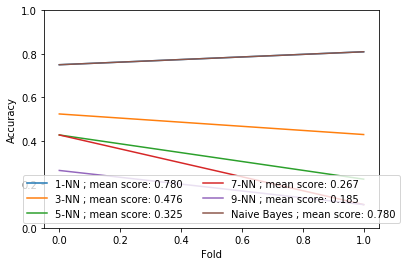

In [22]:
fig,ax = plt.subplots(figsize=(6,4))
for name, model in models.items():
    cv_scores = skms.cross_val_score(model,
                                    zoo_train_ftrs, 
                                    zoo_train_tgt,
                                    cv=2,
                                     scoring='f1_macro',
                                     n_jobs=-1
                                    )
    my_lbl="{} ; mean score: {:.3f}".format(name,cv_scores.mean())
    ax.plot(cv_scores,label=my_lbl)#,marker=next(markers))
    ax.set_ylim(0.0,1,1)
    ax.set_xlabel('Fold')
    ax.set_ylabel('Accuracy')
    ax.legend(loc='lower center', ncol=2);